In [7]:
# HW-6
# Yogesh Gajula
# Sindhuja Shaga

In [8]:

# Cell 1: Install roboflow if not already installed
import subprocess
import sys

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

try:
    import roboflow
except ImportError:
    install("roboflow")


In [9]:

# Cell 2: Import necessary libraries and setup Roboflow
from roboflow import Roboflow

class RoboFlowSetup:
    def __init__(self, api_key, workspace_name, project_name, version_number):
        self.api_key = api_key
        self.workspace_name = workspace_name
        self.project_name = project_name
        self.version_number = version_number
        self.rf = Roboflow(api_key=self.api_key)
        self.project = self.rf.workspace(self.workspace_name).project(self.project_name)
        self.version = self.project.version(self.version_number)
        self.model = self.version.model
    
    def download_dataset(self, model_format):
        return self.version.download(model_format)

# Initialize RoboFlow setup
rf_setup = RoboFlowSetup(api_key="1keefoZmDFOJSw6qft32", workspace_name="objectdetection-i2zcf", project_name="object-detection-chiq6", version_number=1)

# Download dataset (if necessary)
dataset = rf_setup.download_dataset("yolov9")


loading Roboflow workspace...
loading Roboflow project...


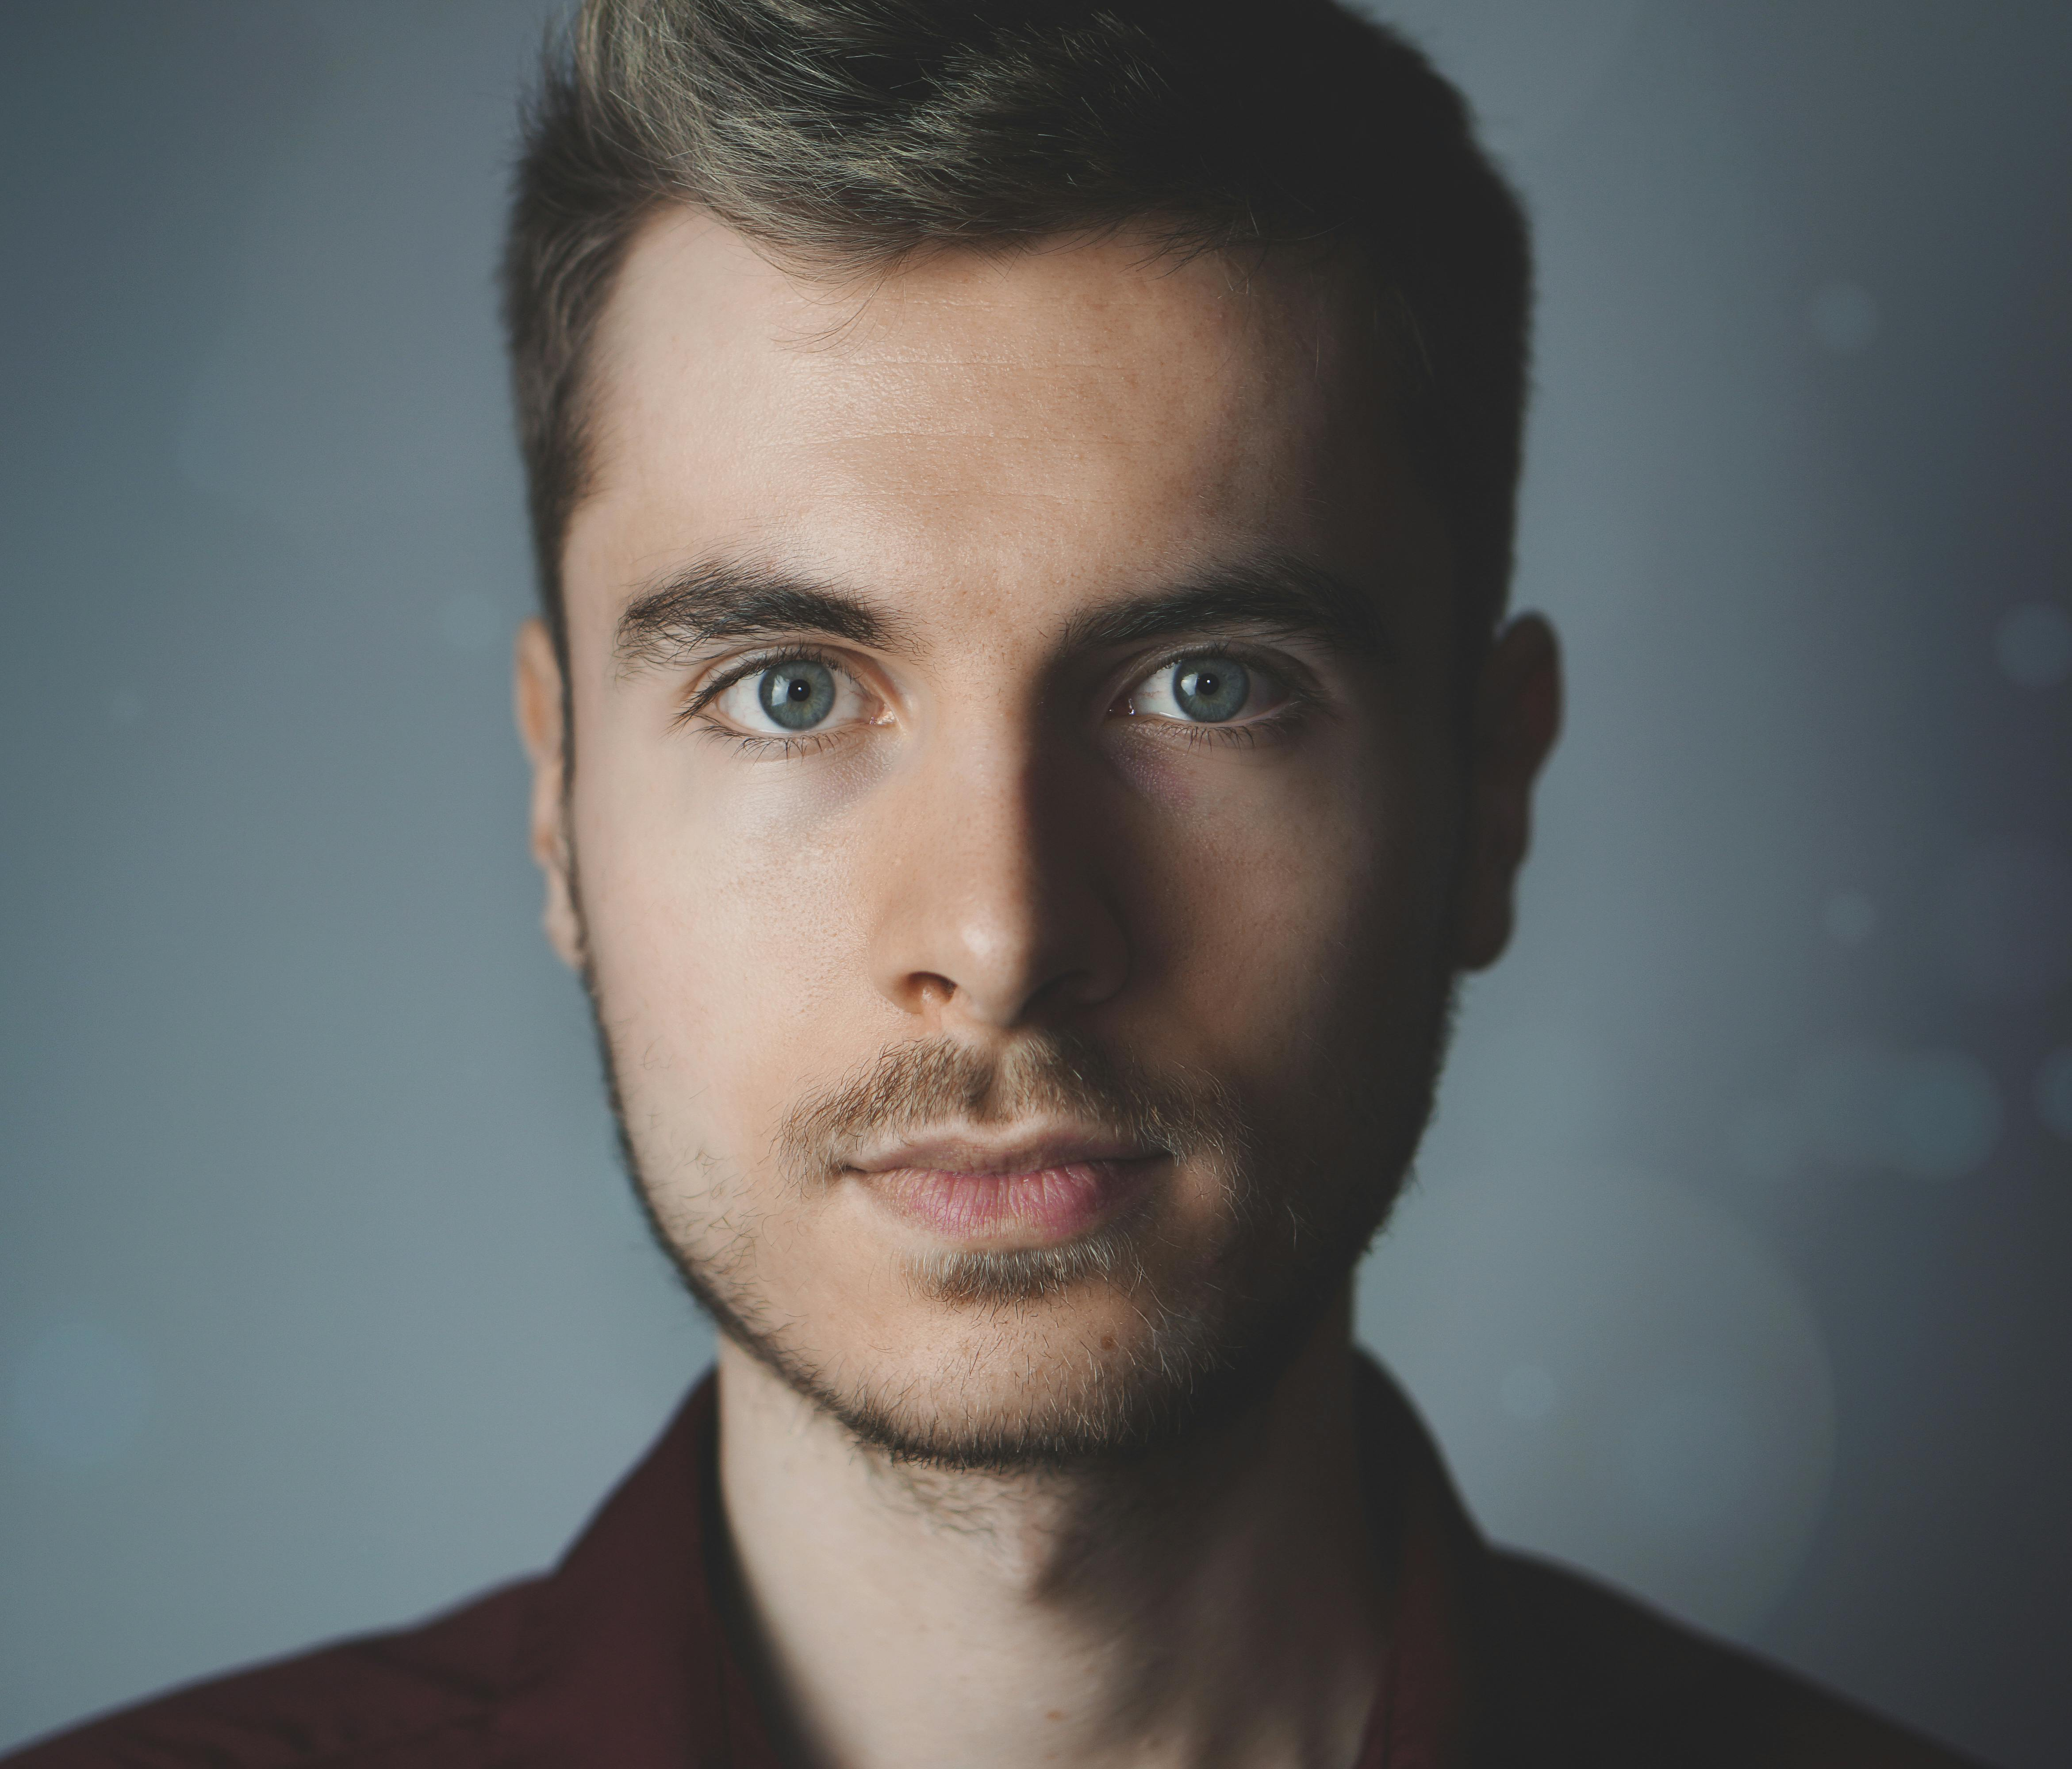

{'predictions': [{'x': 2210,
   'y': 1556,
   'width': 1654,
   'height': 612,
   'confidence': 0.779674232006073,
   'class': 'Eyes',
   'class_id': 0,
   'detection_id': '3177477a-f741-4b8b-86a1-590c919c1d33',
   'image_path': '/Users/yogesh/Downloads/Eyes_Detection/Human.jpg',
   'prediction_type': 'ObjectDetectionModel'}],
 'image': {'width': '4684', 'height': '4000'}}

In [10]:
# Cell 3: Perform prediction and save the result
from IPython.display import Image, display

class ImagePredictor:
    def __init__(self, model):
        self.model = model
    
    def predict_and_save(self, img_path, confidence, overlap, save_path):
        display(Image(filename=img_path))
        prediction = self.model.predict(img_path, confidence=confidence, overlap=overlap).json()
        self.model.predict(img_path, confidence=confidence, overlap=overlap).save(save_path)
        return prediction

# Initialize ImagePredictor
img_predictor = ImagePredictor(model=rf_setup.model)
img_path = "/Users/yogesh/Downloads/Eyes_Detection/Human.jpg"
save_path = "/Users/yogesh/Downloads/Eyes_Detection/prediction.jpg"
img_predictor.predict_and_save(img_path, confidence=40, overlap=30, save_path=save_path)

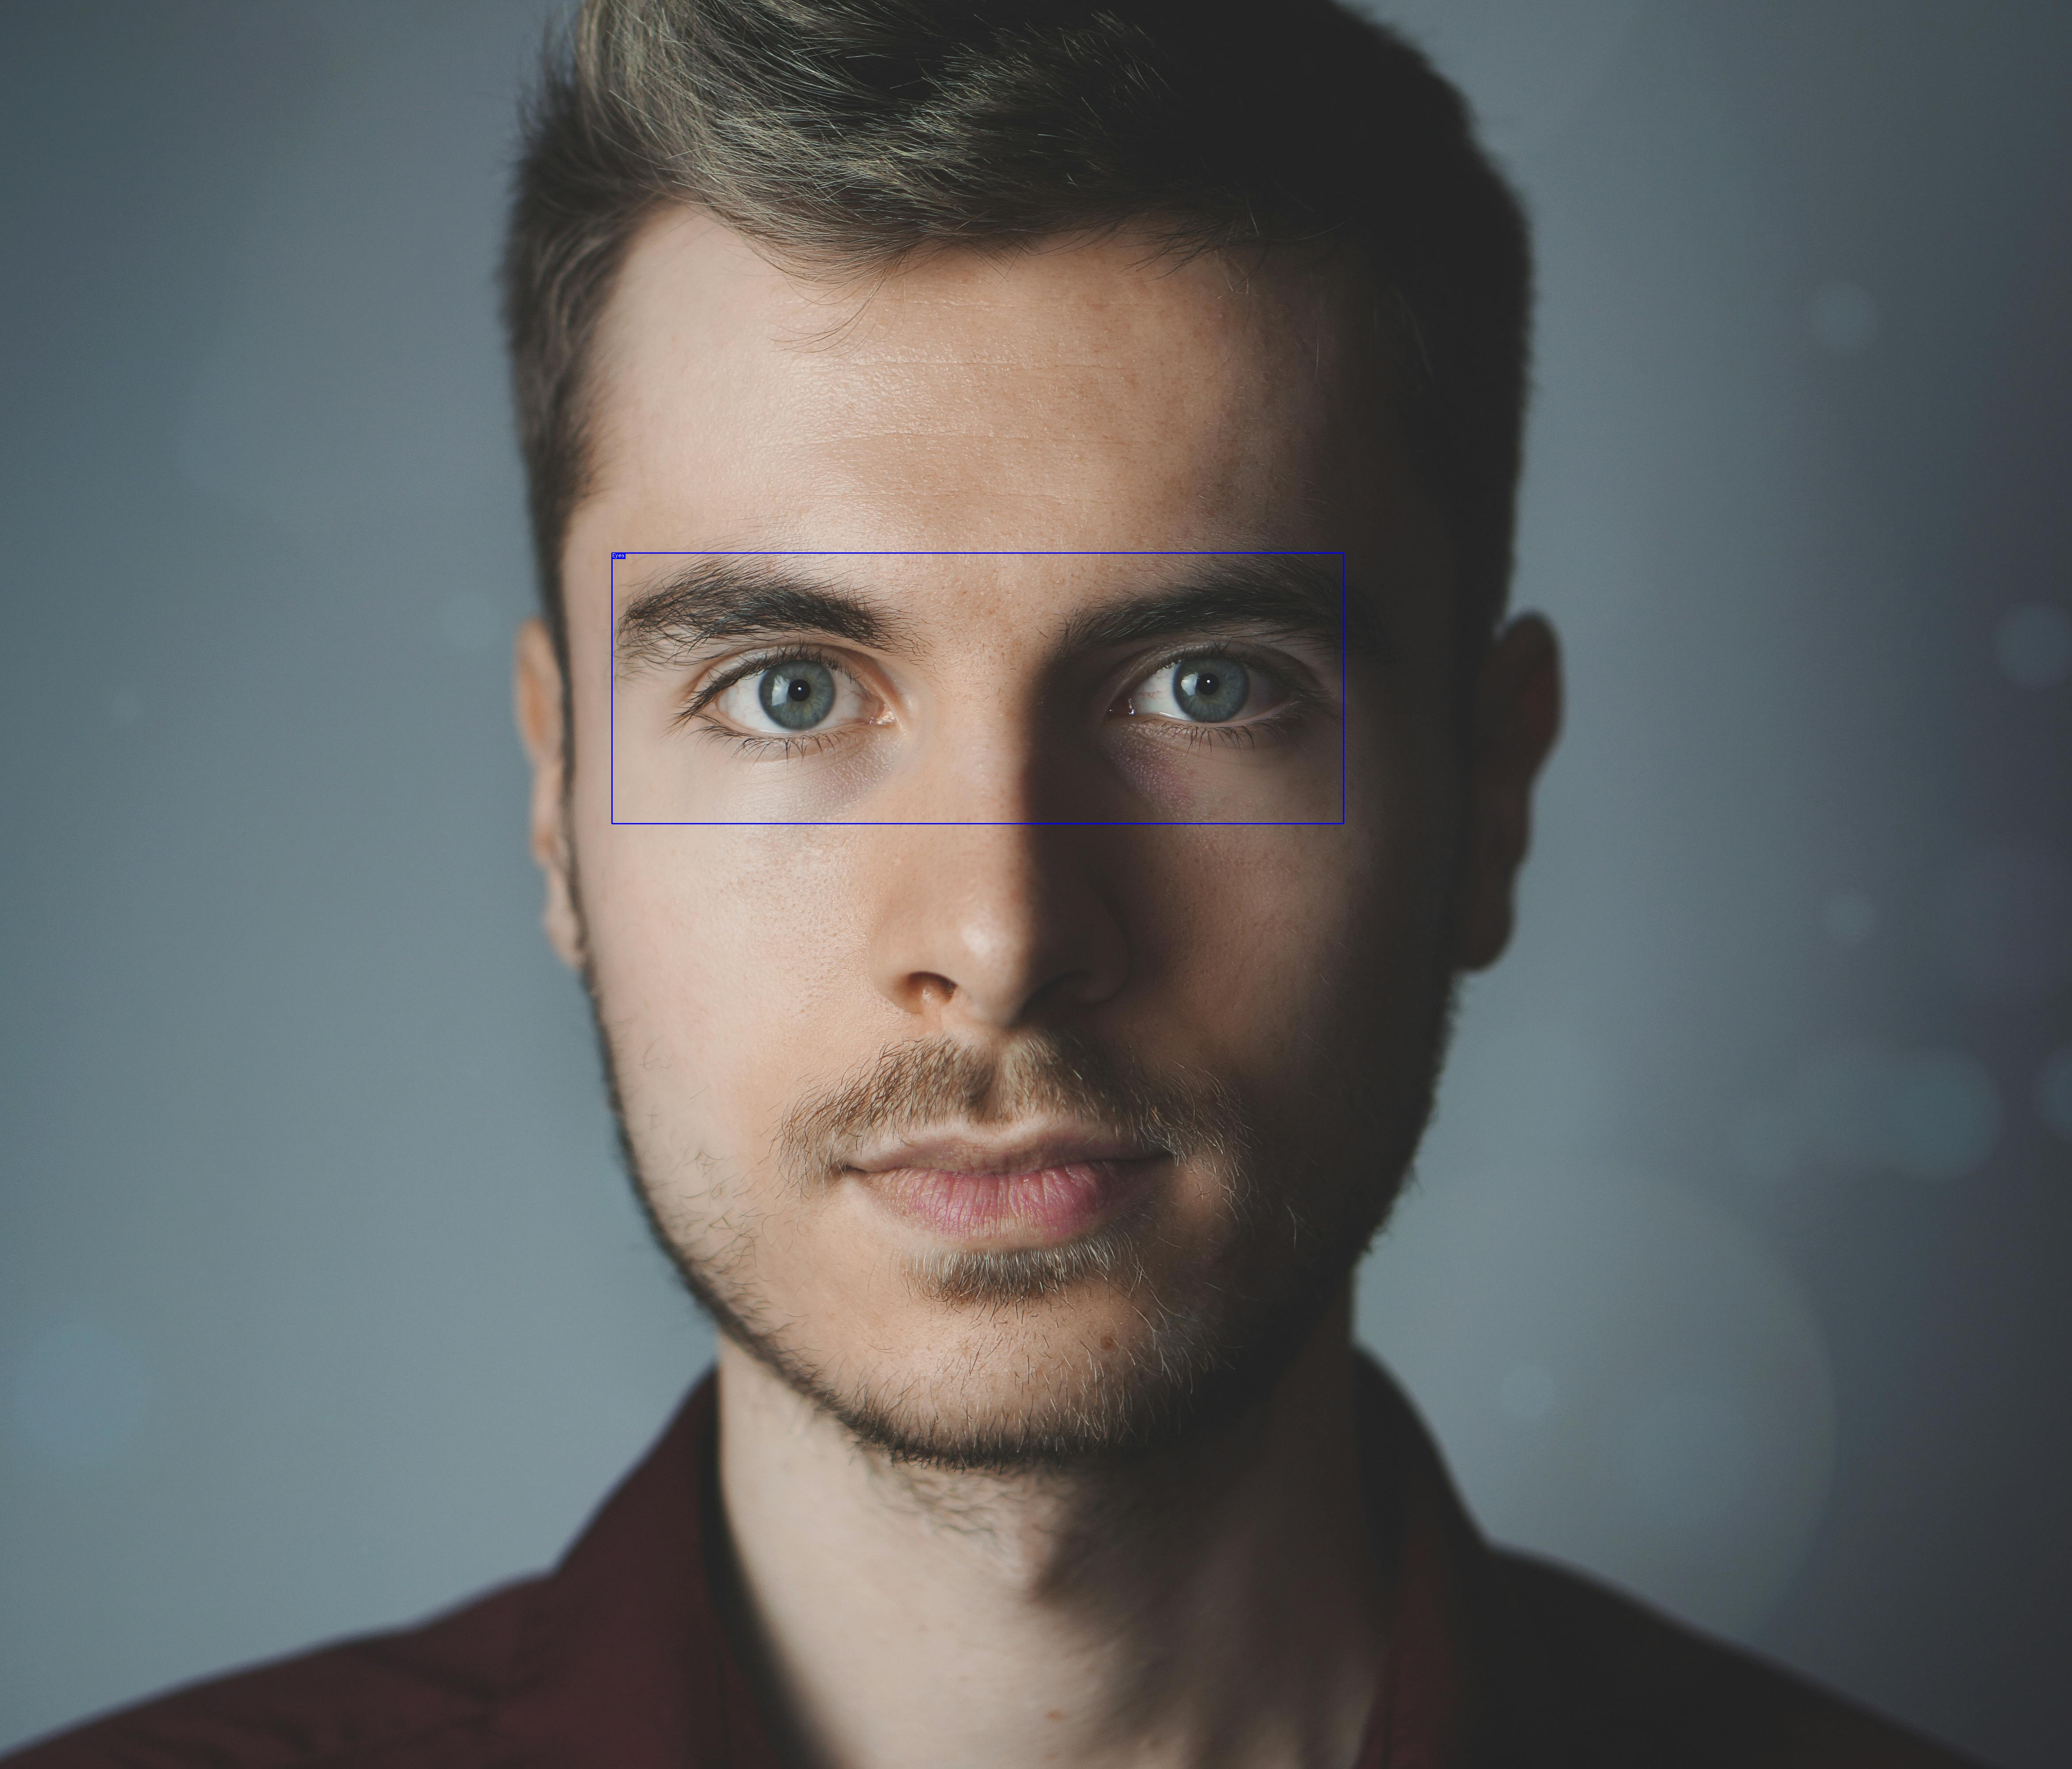

In [11]:

# Cell 5: Display the saved prediction image
from IPython.display import Image, display
display(Image(filename=save_path))
